---
### *The Tenth Computational Neuroscience Winter School*
# Tutorial I: Neuronal Dynamics - Spatial Neuron Models (Passive Cable Theory)

---
__Date__: *Jan. 13, 2021*

__Content Creators:__ Songting Li, Kai Chen

# Setup

In [1]:
# @title Import most modules and functions needed
import time
import numpy as np 
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Tutorial Objectives

Neurons in the brain exhibit delicate dendritic structures that are crucial for their computations. Spatial neuron models have been developed to capture the feature of dendrites. In this notebook, we will introduce the cable theory that describes the spatiotemporal dynamics of the membrane potential along a dendrite, and develop spatial neuron models based on the cable theory for simulations.  

**References:** 
* Henry Tuckwell (1988) Introduction to theoretical neurobiology. Vol. 1, Linear cable theory and dendritic structure
* Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski (2014) Neuronal Dynamics: From single neurons to networks and models of cognition
From single neurons to networks and models of cognition

## Derivation of the Cable Equation
Let's consider a piece of cylindric dendrite with length $dx$. The circuit diagram of this dendritic segment is shown in the schematic drawing below

<img src="circuit.png" alt="Drawing" style="width: 400px;"/>

Using Kirchhoff’s laws, we find equations that relate the voltage $v(x)$ across the membrane at location $x$ with longitudinal and transversal currents. First, a longitudinal current $i(x)$ passing through the dendrite causes a voltage drop across the longitudinal resistor $R_L$ according to Ohm’s law,

\begin{equation}
v(x+dx,t)−v(x,t)=-R_Li(x,t) \ \ \ \ \ \ \ \   (1)
\end{equation}

where $v(x+dx,t)$ is the membrane potential at the neighbouring point $x+dx$. Second, the transversal current that passes through the RC-circuit is given by $C\frac{\partial }{\partial t}v(x,t)+\sum_{ion}I_{ion}-I_{ext}$, where the sum runs over all ion channel types present in the dendrite. Kirchhoff’s law regarding the conservation of current at each node leads to

\begin{equation}
-i(x+dx,t)+i(x,t)=C\frac{\partial }{\partial t}v(x,t)+\sum_{ion}I_{ion}-I_{ext}(x,t).   \ \ \ \ \ \ \ \   (2)
\end{equation}

The values of the longitudinal resistance $R_L$, the capacity $C$, the ionic currents as well as the externally applied current can be expressed in terms of specific quantities per unit length $r_L$, $c$, $i_{ion}$ and $i_{ext}$, respectively.

\begin{equation}
R_L=r_Ldx, C=cdx, I_{ext}(x,t)=i_{ext}(x,t)dx, I_{ion}(x,t)=i_{ion}(x,t)dx.  \ \ \ \ \ \ \ \   (3)
\end{equation}

These scaling relations express the fact that the longitudinal resistance and the capacitance increases with the length of the cylinder. Similarly, the total amount of transversal current increases with the length $dx$ simply because the surface through which the current can pass is increasing. Substituting these expressions in Eqs. (1) and (2), dividing by $dx$, and taking the limit $dx→0$ leads to

\begin{equation}
\begin{split}
\frac{\partial}{\partial x}v(x,t)&=r_Li(x,t)\ \ \ \ \ \ \ \   (4a)\\
\frac{\partial}{\partial x}i(x,t)&=c\frac{\partial }{\partial t}v(x,t)+\sum_{ion}i_{ion}(x,t)−i_{ext}(x,t).\ \ \ \ \ \ \ \   (4b)
\end{split}
\end{equation}

Taking the derivative of equation (4a) with respect to $x$ and substituting the result into (4b) yields

\begin{equation}
\frac{\partial^2}{\partial x^2}v(x,t)=cr_L\frac{\partial}{\partial t}v(x,t)+r_L\sum_{ion}i_{ion}(x,t)−r_Li_{ext}(x,t). \ \ \ \ \ \ \ \   (5)
\end{equation}

Eq. (5) is called the general cable equation.

##  Cable Equation for Passive Linear Dendrite
The ionic currents $\sum_{ion}i_{ion}(x,t)$ in Eq. (5) can in principle comprise many different types of ion channels. For simplicity, the dendrite is sometimes considered as passive. This means that the current density follows Ohm's law $\sum_{ion}i_{ion}(x,t)=g_L(v−e_L)$ where $g_L=1/r_T$ is the leak conductance per unit length and $e_L$ is the leak reversal potential.

To further simplify Eq. (5), we introduce the characteristic length scale $\lambda^2=r_T/r_L$ (electrotonic length scale) and the membrane time constant $τ=r_Tc$. If we multiply Eq. (5) by $\lambda^2$, we get

\begin{equation}
\lambda^2\frac{\partial^2}{\partial x^2}v(x,t)=\tau\frac{\partial}{\partial t}v(x,t)+[v(x,t)−e_L]-r_Ti_{ext}(x,t).
\end{equation}

After a transformation to unit-free coordinates,

\begin{equation}
x→\hat{x}=x/λ, t→\hat{t}=t/τ,   
\end{equation}

and a rescaling of the current and voltage variables,

\begin{equation}
i_{ext}→\hat{i}_{ext}   =r_Ti_{ext}, v→\hat{v}=v−e_L,
\end{equation}

we obtain the cable equation (where we have dropped the hats)

\begin{equation}
\frac{\partial}{\partial t}v(x,t)=\frac{\partial^2}{\partial x^2}v(x,t)−v(x,t)+i_{ext}(x,t),   \ \ \ \ \ \ \ \   (6)  
\end{equation}

in an elegant unit-free form.

The cable equation can be easily interpreted. The change in time of the voltage $v$ at location $x$ is determined by three different contributions. On the right-hand side of Eq. (6), the first term $\frac{\partial^2}{\partial x^2}v(x,t)$ is a diffusion term that is positive if the voltage $v(x,t)$ is a convex function of $x$. The voltage $v(x,t)$ thus tends to increase, if the values of $v$ are higher in a neighborhood of $x$ than at $x$ itself. The second term $−v(x,t)$ is a simple decay term that causes the voltage to decay exponentially towards zero (i.e., the resting state). The third term is a source term that drives the voltage away from zero (i.e., the resting state). This source can be due to an externally applied current or to synaptic input arriving at location $x$.

##  Cable Equation for Active Nonlinear Dendrite
In the context of a realistic modeling of biological neurons, two non-linear extensions of the cable equation will be discussed as follows. The obvious one is the inclusion of non-linear elements in the circuit diagram that account for specialized ion channels. As we have seen in the Hodgkin-Huxley model, ion channels can exhibit a complex dynamics that is in itself governed by a system of (ordinary) differential equations. The current through one of these channels could be a non-linear function of the membrane potential value. Using the symbolic notation $i_{ion}[v](x,t)$ for this functional dependence, the extended cable equation takes the form

\begin{equation}
\frac{\partial}{\partial t}v(x,t)=\frac{\partial^2}{\partial x^2}v(x,t)−v(x,t)-i_{ion}[v](x,t)+i_{ext}(x,t).
\end{equation}

A more subtle complication arises from the fact that a synapse can not be treated as an ideal current source. The effect of an incoming action potential is the opening of ion channels. The resulting current is proportional to the difference of the membrane potential and the corresponding ionic reversal potential. Hence, a time-dependent conductivity provides a more realistic description of synaptic input than an ideal current source with a fixed time course.

If we replace the external input current $i_{ext}(x,t)$ in Eq. (6) by an appropriate synaptic input current $i_{syn}(x,t)=-g_{syn}(x,t)[v(x,t)-e_{syn}]$ with $g_{syn}$ being the synaptic conductivity and $e_{syn}$ the corresponding reversal potential, we obtain

\begin{equation}
\frac{\partial}{\partial t}v(x,t)=\frac{\partial^2}{\partial x^2}v(x,t)−v(x,t)−g_{syn}(x,t)[v(x,t)−e_{syn}].
\end{equation}

## Analytical Solutions to Passive Cable Model
In order to get an intuitive understanding of the behavior of the cable equation of a passive dendrite, we look for stationary solutions of Eq. (6), i.e., for solutions with $\frac{\partial}{\partial t}v(t,x)=0$. In that case, the partial differential equation reduces to an ordinary differential equation in $x$,

\begin{equation}
\frac{\partial^2}{\partial x^2}v(x)−v(x)=−i_{ext}(x). 
\end{equation}

Solutions for non-vanishing input current can be found by standard techniques such as Green's function method (see Tuckwell 1988). For an infinitely-long cable with boundary conditions $v(±\infty)=0$, given a stationary input current $i_{ext}(t,x)$=$\delta(x)$ localized at $x=0$, we can find the solution as 

\begin{equation}
G(t,x)=\frac{1}{2}e^{-|x|} \ \ \ \ \ \ \ \   (7)  
\end{equation}

The solution to a $\delta$-pulse input is known as the Green's function of the equation. Note that this solution is given in units of the intrinsic length scale $\lambda=\sqrt{r_T/r_L}$. If we re-substitute the physical units, we see that $\lambda$ is the length over which the stationary membrane potential drops by a factor $1/e$. In the literature $\lambda$ is referred to as the electrotonic length scale. A typical electrotonic length scale for a passive cable is about $\lambda \approx 1 mm$. However, the electrotonic length can be significantly smaller if the transversal conductivity is increased, e.g., due to the open of ion channels.

For arbitrary stationary input current $i_{ext}(x)$, the solution of Eq. (6) for an infinitely long cable can be found by a superposition of translated fundamental solutions [Eq. (7)],

\begin{equation}
v(x)=\int_{-\infty}^{+\infty} G(x-y)i_{ext}(y)  dy=\int_{-\infty}^{+\infty} \frac{1}{2}e^{-|x-y|}i_{ext}(y) dy.  \ \ \ \ \ \ \ \   (8) 
\end{equation}

Suppose a current pulse $i_{ext}(t,x)=\delta(x)\delta(t)$ is injected at time $t=0$ at location $x=0$. The time course of the voltage at an arbitrary position $x$ can be derived as

\begin{equation}
G(t,x)=\frac{\Theta(t)}{\sqrt{4πt}}exp\Big(−t−\frac{x^2}{4t}\Big),
\end{equation}

where $\Theta(t)$ is the Heaviside function, i.e., $\Theta(t)=1$ for $t>0$ and $\Theta(t)=0$ otherwise. Knowing the Green’s function, the solution for an infinitely long cable is given by

\begin{equation}
v(t,x)=\int_{0}^{+\infty}dt\int_{-\infty}^{+\infty}  dy G(t-\tau,x-y)i_{ext}(t-\tau,y).
\end{equation}

The Green’s function is therefore a particularly elegant and useful mathematical tool. Once we have solved the linear cable equation for a single short current pulse, you can write down the full solution to arbitrary input as an integral over (hypothetical) pulse-inputs at all places and all times.

The Green's function for other cable models can be found in the book "Introduction to Theoretical Neurobiology" by Henry C. Tuckwell. For example, a dendritic cable with a semi-infinite long length, a dendritic cable with finite length, and a dendritic cable with a finite length connecting to a spherical soma.

## Multi-compartment Cable Model

We have seen that analytical solutions can be solved for the voltage along a passive cable with uniform geometrical and electrical properties. If we want to apply the above results in order to describe the membrane potential along the dendritic tree of a neuron we face several problems. Even if we neglect active conductances formed by non-linear ion channels, a dendritic tree is at most locally equivalent to an uniform cable. Numerous bifurcations and variations in diameter and electrical properties along the dendrite render it difficult to find a solution for the membrane potential analytically. Therefore, we do numerics!

Numerical treatment of the cable equation requires a discretization of the spatial variable. Hence, all derivatives with respect to spatial variables are approximated by the corresponding quotient of differences. Essentially we are led back to the discretized model that has been used as the starting point for the derivation of the cable equation. After the discretization we have a large system of ordinary differential equations for the membrane potential at the chosen discretization points as a function of time. This system of ordinary differential equations can be treated by standard numerical methods.

In order to solve for the membrane potential of a complex dendritic tree numerically, compartmental models are used that are the result of the above mentioned discretization. The dendritic tree is divided into small cylindric compartments with an approximatively uniform membrane potential. Each compartment is characterized by its capacity and transversal conductivity. Adjacent compartments are coupled by the longitudinal resistance that are determined by their geometrical properties (see the schematic diagram below).

<img src="circuit2.png" alt="Drawing" style="width: 400px;"/>

Correspondingly, Eq. (6) for a single dendritic compartment changes to be 

\begin{equation}
\frac{d}{dt}v_k(t)=\frac{[v_{k-1}(t)-2v_{k}(t)+v_{k+1}(t)]}{(\Delta x)^2} −v_k(t)+i^{ext}_{k}(t)
\end{equation}

for multiple-compartment case, where $v_k$ is the membrane potential at the $k$th compartment, and $i^{ext}_{k}(t)$ is the externally injected current at the $k$th compartment.

## Simulation of a Spatial Neuron
As mentioned above, the analytical solution for a spatial neuron with complicated morphology and nonlinear dynamics is in general difficult to solve. To understand the function of dendrites, computational simulation is a helpful approach. We next introduce how to simulate a spatial neuron with dendrites using the simulation environment **Brian 2**. The introduction of Brian 2 and the corresponding documents can be found in https://brian2.readthedocs.io/en/stable/index.html. The installation of Brian 2 shall follow the [link](https://brian2.readthedocs.io/en/stable/introduction/install.html). 

You can either install Brian 2 in the Anaconda root environment, or [create a new environment](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for Brian 2. The latter has the advantage that you can update (or not update) the dependencies of Brian 2 independently from the rest of your system.

```bash
$ conda install -c conda-forge brian2
```

*Note: Brian 2 is not part of the main Anaconda distribution, but built using the community-maintained conda-forge project. You will therefore have to to install it from the conda-forge channel, as shown above.*

After the installation of Brian 2, we can initialize the simulation parameters and create a cylindric dendrite with length $3 mm$ (a very long dendrite) and diameter $2 \mu m$ by executing the cell below. Note that every quantity defined in Brain2 needs to specify a correct unit! Brain2 will check the consistancy of dimension during simulation. 

In [2]:
from brian2 import *  # import all module contained in Brian2, 
                      #   including basic array and plot functions.

#time step to simulate the neuron model
defaultclock.dt = 0.01*ms

# morphology
diameter = 2*um       # diameter of the dendrite
length = 3*mm         # length of the dendrite
N = 600               # segment number of the dendrite
morpho = Cylinder(diameter=diameter, 
                  length=length, 
                  n=N) # create a cylinder in Brain2 with the geometrical parameters

# passive parameters
Cm = 1*uF/cm**2         # capacitance 
Ri = 150*ohm*cm         # axial resisance
gL = 1e-4*siemens/cm**2 # leak conductance 
EL = -70*mV             # leakage potential

# current dynamics in each segment
eqs = '''
Im = gL * (EL - v) : amp/meter**2
I : amp (point current)
'''

# Create a neuron in Brain2 who only has a single dendrite
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method='exponential_euler')
neuron.v = EL   # initialize the voltage at the leakage (resting) potential

# membrane time constant
taum = Cm/gL  
print("Time constant: %s" % taum)
# electrotonic length
la = neuron.space_constant[0]
print("Electrotonic length: %s" % la)

Time constant: 10. ms
Electrotonic length: 0.57735027 mm


In [3]:
# show morphology in pure text style
morpho.topology()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|  [root] 

### Typical Examples of Brian2 Default Morphologies
| |**Examples**| |
|--:|:--|:--:|
|**Soma**|`Soma(diameter=30*um)`| ![](https://brian2.readthedocs.io/en/stable/_images/soma.svg)|
|**Cylinder**|`Soma(n=5, diameter=10*um, length=50*um)`| ![](https://brian2.readthedocs.io/en/stable/_images/cylinder.svg)|
|**Section**|`Section(n=5, diameter=[15, 5, 10, 5, 10, 5]*um), length=[10,20,5,5,10]*um`| ![](https://brian2.readthedocs.io/en/stable/_images/section.svg)|


### Example 1:
Let's inject a constant current with amplitude $0.02nA$ in the middle of the dendrite by executing the cell below.

In [4]:
# injecting a current at the middle of the dendrite
neuron.I[len(neuron) // 2] = 0.02*nA  # inject a constant current
run(100*ms, report='text')            # run the simulation and print the simulation specs

Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


Let's plot the simulation result, and compare it with the analytical solution [Eq. (8)]. When you plot, it is suggested to make the variables dimensionless. 

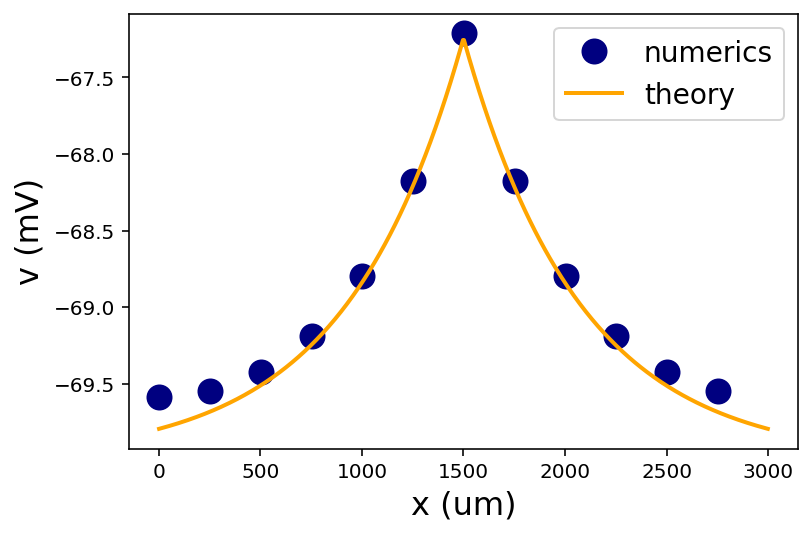

In [5]:
plot(neuron.distance[::50]/um,         # spatial grid with spatial step size equals 50 segments
     neuron.v[::50]/mV,                # membrane potential for corresponding segments
     'navy', marker='o', linestyle='', # curve styling
     ms=12, label='numerics')   

# Theoretical result
x = neuron.distance
ra = la * 4 * Ri / (pi * diameter**2)
theory = EL + ra*neuron.I[len(neuron) // 2] * 0.5 * exp(-abs(length/2 - x) / la) 
plot(x/um, theory/mV, 'orange', lw = 2, alpha = 1.0, label='theory')
xlabel('x (um)')
ylabel('v (mV)')
legend()
show()

**Thinking**: The simulation result is well approximated by the theortical solution derived from the infinite-length cable model receiving stationary current input [Eq. (8)]. _Can you figure out why the two solutions overlap well in the middle of the dendritic cable but not at the end of the dendrite? What happens if you make the dendritic length longer?_

**Exercise 1:** Now it is your time to stimulate the dendrite. Try inject a constant current with amplitude $0.02nA $ at one end of the dendrite $x=0$.

In [6]:
# initialize the input current and the voltage
neuron.I = 0*amp
neuron.v = EL

# insert your code here to inject current at the left end, i.e., x=0

In [7]:
# initialize the input current and the voltage
neuron.I = 0*amp
neuron.v = EL

# injecting at the left end x=0
neuron.I[0] = 0.02*nA 
run(100*ms, report='text')

Starting simulation at t=100. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


Plot the simulation result, and compare it with the analytical solution.

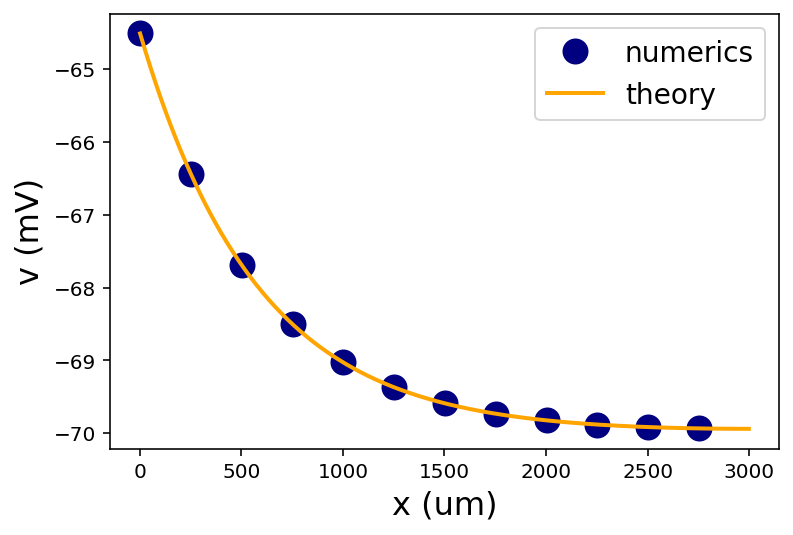

In [8]:
plot(neuron.distance[::50]/um, neuron.v[::50]/mV, 'navy',marker='o', linestyle='', ms=12,label='numerics')

# Theoretical results
x = neuron.distance
ra = la * 4 * Ri / (pi * diameter**2)
theory = EL + ra * neuron.I[0] * cosh((length - x) / la) / sinh(length / la)
plot(x/um, theory/mV, 'orange', lw = 2, alpha = 1.0,label='theory')
xlabel('x (um)')
ylabel('v (mV)')
legend()
show()

### Example 2:
In the brain, the input is in general non-constant. Let's give a triansient pulse-input current in the middle of the dendrite, and simulate the dendrite by executing the cell below. Different from the previous case, here we use net.run() instead of run() to simulate the neuron. This is because run() will continue the previous simulation time instead of starting from zero! See details between them: https://brian2.readthedocs.io/en/stable/user/running.html?highlight=net.run

In [9]:
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method = 'exponential_euler')
neuron.v = EL
neuron.I = 0*amp
T=10*ms

#Decorator to make a function get called every time step of a simulation
@network_operation(dt=defaultclock.dt, when='start')
def update_currents(t):
    neuron.I[len(neuron)//2] = 10*nA*(int(t<0.02*ms))  # injecting a pulse input in the middle
                                                       #  during the first 0.02 ms.

# Monitors is used to record the time trace of variables
mon = StateMonitor(neuron, 'v', record=range(0, N//2, N//10))

net = Network(neuron, update_currents, mon)
net.run(T, report='text')

Starting simulation at t=0. s for a duration of 10. ms
10. ms (100%) simulated in < 1s


Plot the simulation result, and compare it with the analytical solution.

In [10]:
# print the shape of data stored in the monitor
mon.v.T.shape

(1000, 5)

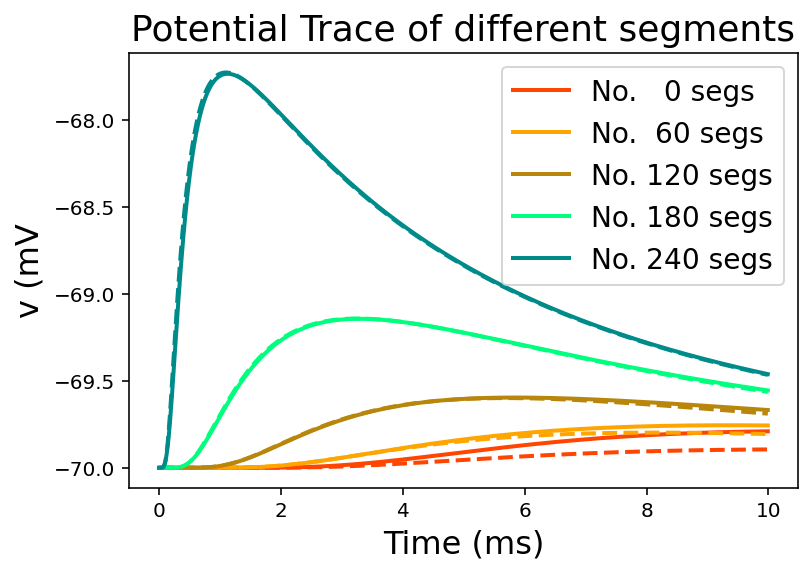

In [11]:
# specify line colors
colors = ['orangered', 'orange', 'darkgoldenrod', 'springgreen', 'darkcyan']
# plot simulated voltage trace
lines = plot(mon.t/ms, mon.v.T/mV, '-')
# set line colors
[line.set_color(colors[i]) for i, line in enumerate(lines)]
# set legends
legend(lines, [f'No. {i:>3d} segs' for i in np.arange(0,N//2,N//10)])

# Theoretical results (incorrect near cable ends)
t = mon.t
color_id = 0
for i in range(0, len(neuron)//2, N//10):
    x = (len(neuron)/2 - i) * morpho.length[0]
    theory = (1/(la*Cm*pi*diameter) * sqrt(taum / (4*pi*(t + defaultclock.dt))) *
              exp(-(t+defaultclock.dt)/taum -taum / (4*(t+defaultclock.dt))*(x/la)**2))
    theory = EL + theory * 10*nA * 0.02*ms
    plot(t/ms, theory/mV,'--', color=colors[color_id])
    color_id += 1
xlabel('Time (ms)')
ylabel('v (mV')
title('Potential Trace of different segments')
show()

### Example 3:
A real neuron has a soma in general. So let's create a soma connecting to the dendrite. This is the so-called ball-and-stick model. Let's inject a pulse current $0.2nA$ into the middle of the dendrite for $10 ms$.

In [12]:
#create a soma
morpho = Soma(diameter=30*um)

#create a dendrite attached to the soma
morpho.dendrite = Cylinder(diameter=1*um, length=600*um, n=600)

#create a neuron with the soma-dendrite structure
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method='exponential_euler')
neuron.v = EL 

@network_operation(dt=0.01*ms, when='start')
def update_currents(t):
    neuron.I[len(neuron)//2] = 0.2*nA*(t<10*ms)

mon = StateMonitor(neuron, ['v', 'I'], record=True)

net = Network(neuron, update_currents, mon)
net.run(20*ms, report='text')

Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s


Plot the simulation result,

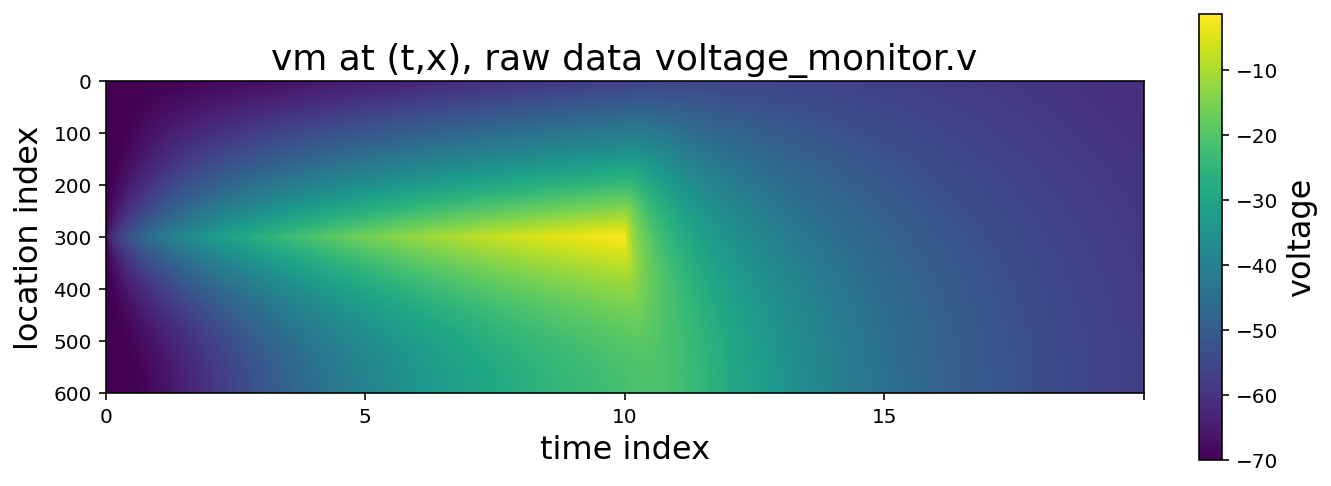

In [13]:
figure(figsize=[10,10])
imshow(mon.v /mV)
colorbar(label="voltage",fraction=0.02)
xlabel("time index")
ylabel("location index")
plt.xticks(ticks=np.array([0.,500., 1000., 1500., 2000.]), 
           labels=['{:.0f}'.format(v) for v in np.array([0., 500., 1000., 1500.])*0.01]);
title("vm at (t,x), raw data voltage_monitor.v");

**Exercise 2:** Make a plot to show that the voltage response at the soma is smaller than that at the far end of the dendrite. _Can you figure out why this is true?_

Text(0, 0.5, 'voltage (mV)')

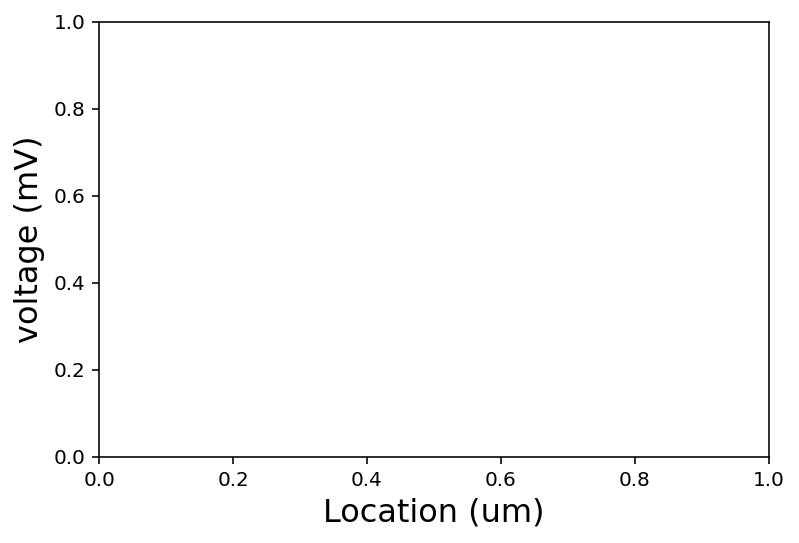

In [14]:
# insert your code here
xlabel("Location (um)")
ylabel("voltage (mV)")

Text(0, 0.5, 'voltage (mV)')

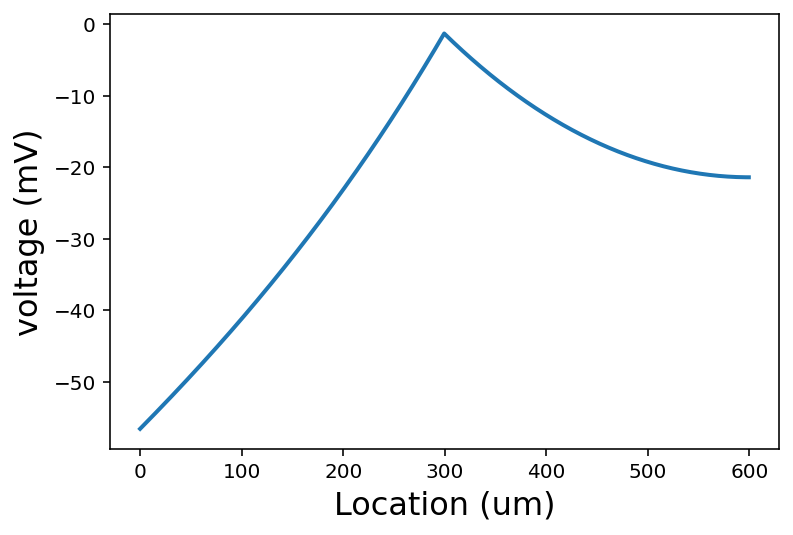

In [15]:
# plot voltage profile at t = 10ms
plot(neuron.distance/um, mon.v[:,round(10/0.01)]/mV)   
xlabel("Location (um)")
ylabel("voltage (mV)")

**Exercise 3:** (Direction selectivity) Direction-selective neurons respond to image motion in a preferred direction but not in the opposite NULL direction. They can be found in many species from fly eyes to mammalian cortex, and in all these cases a role for dendritic computation has been proposed. Rall (1964) provided the first model for how dendrites can implement a directionally selective unit.

![direction_selectivity](./direction_selectivity.jpeg)

The idea is simple: Synaptic input generated on the distal part of the dendrite is delayed at the soma by the dendritic filtering compared with proximal input. If synaptic inputs are activated in a sequence starting from the distal location of the dendrite toward the soma (the centripetal direction), then the EPSPs in the soma will sum effectively and the resulting somatic voltage would be large. In contrast, activating the same inputs in the centrifugal direction would result in a much less degree of summation because the proximal EPSP will decay by the time the distally originated EPSP will arrive. Assuming that the voltage peak is translated into action potentials, the neuron will show directional selectivity. Let's test this idea via simulations. 

In [16]:
morpho = Soma(diameter=30*um)
morpho.dendrite = Cylinder(diameter=1*um, length=600*um, n=600)
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method='exponential_euler')

neuron.v = EL 

@network_operation(dt=1.*ms, when='start')
def update_currents_prefer(t):
    #from x=600um to x=60 um with an spatial interval of 60 um and time interval of 10 ms
    #the current input can last for 1ms at each synapse with an amplitude of 1nA
    neuron.I = 0
    for id_t in range(10):  
        neuron.I[len(neuron)//10*(10-id_t)-1] = neuron.I[len(neuron)//10*(10-id_t)-1] \
        + 1*nA * (int(t<=10.*id_t*ms+1.*ms)-int(t<=10.*id_t*ms))

mon = StateMonitor(neuron, ['v', 'I'], record=0)
net_prefer = Network(neuron, update_currents_prefer, mon)
net_prefer.run(100*ms, report='text') 

v_prefer = mon.v[0,:]/mV 

morpho = Soma(diameter=30*um)
morpho.dendrite = Cylinder(diameter=1*um, length=600*um, n=600)
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method='exponential_euler')

neuron.v = EL 
@network_operation(dt=1.*ms, when='start')
def update_currents_nonprefer(t):
    #from x=60um to x=600 um with an spatial interval of 60 um and time interval of 10 ms
    #the current input can last for 1ms at each synapse with an amplitude of 1nA
    neuron.I = 0
    for id_t in range(10):
        neuron.I[len(neuron)//10*(id_t+1)-1] = neuron.I[len(neuron)//10*(id_t+1)-1] \
        + 1*nA * (int(t<=10.*id_t*ms+1.*ms)-int(t<=10.*id_t*ms))

mon = StateMonitor(neuron, ['v', 'I'], record=0)

net_nonprefer = Network(neuron, update_currents_nonprefer, mon)
net_nonprefer.run(100*ms, report='text')

v_nonprefer = mon.v[0,:]/mV 

Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


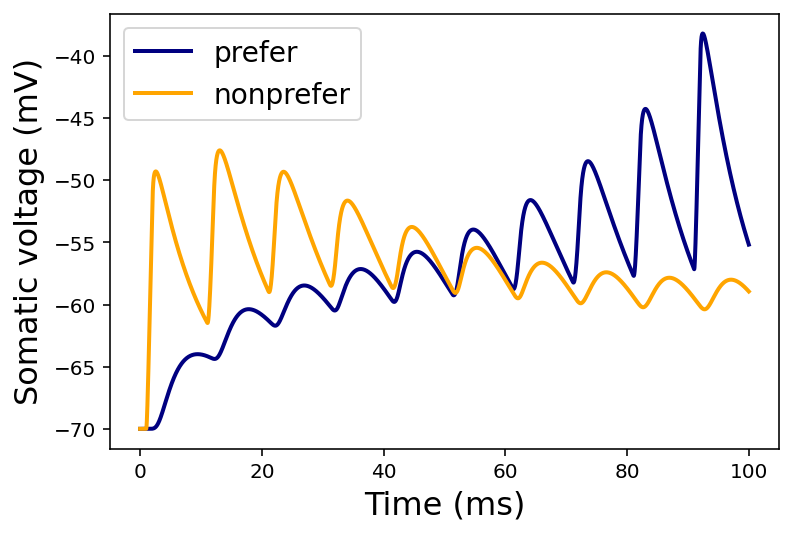

In [17]:
#plot the results
plot(mon.t/ms, v_prefer, 'navy', label='prefer')
plot(mon.t/ms, v_nonprefer, 'orange', label='nonprefer')
xlabel('Time (ms)')
ylabel('Somatic voltage (mV)')
legend(loc='best');
 

## Extra question if you still have time!
**Exercise 5:** (Bilinear dendritic integration rule) In recent experiments (Hao et al, PNAS, 2009; **Li et al, PLOS Comp. Biol. 2014**), given a pair of excitatory input and inhibitory input simultaneously to the dendrite of a hippocampal CA1 pyramidal neuron, the SSP measured at the soma denoted by $V_S$ can be well characterized by a bilinear rule as $V_S = V_E +V_I +k_{EI} · V_EV_I$ , where $V_E$ and $V_I$ are the respective EPSP and IPSP measured at the soma when the E or I input is given alone, and $k_{EI}$ is the shunting coefficient which depends on the dendritic locations and arrival times of the E and I inputs but not the strengths of the inputs. 

Let's verify this bilinear rule in the passive ball-and-stick model using computer simulations by execute the following code. 

In [18]:
# Simulating the neuronal response given synaptic inputs with conductance
start_scope()
# model parameters are the same as previously defined
# Cm = 1*uF/cm**2         # capacitance 
# Ri = 150*ohm*cm         # axial resisance
# gL = 1e-4*siemens/cm**2 # leak conductance 
# EL = -70*mV             # leakage potential
# define ball and stick morphology
t0 = time.time()
morpho = Soma(diameter=30*um)
morpho.dendrite = Cylinder(diameter=2*um, length=600*um, n=600)

eqs = '''
Im = gL * (EL - v) : amp/meter**2
Ie = gE * (VE-v) : amp (point current)
Ii = gI * (VI-v) : amp (point current)
dgE/dt = -gE/gEtau : siemens
dgI/dt = -gI/gItau : siemens
'''
# the reversal potentials for E and I synaptic conductances
VE=0*mV
VI=-80*mV

# time constants for E and I synaptic condutances
gEtau=2*ms
gItau=5*ms

# create a neuron and set its initial voltage
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri, method = 'exponential_euler')
neuron.v = EL

# E and I synaptic input locations
E_loc=round(len(neuron)*0.3)
I_loc=round(len(neuron)*0.5)


# run multiple trials and record EPSP, IPSP
trial_n=10
# Synaptic input
E_times = np.arange(3*trial_n)*100*ms
I_times = np.arange(3*trial_n)*100*ms
E_stim = SpikeGeneratorGroup(1, [0]*E_times.shape[0], E_times)
I_stim = SpikeGeneratorGroup(1, [0]*I_times.shape[0], I_times)
E_syn = Synapses(E_stim, neuron, model='w:siemens', on_pre='gE+=w')
I_syn = Synapses(I_stim, neuron, model='w:siemens', on_pre='gI+=w')
E_syn.connect(i=0, j=E_loc)
I_syn.connect(i=0, j=I_loc)
E_syn.w = 0*siemens
I_syn.w = 0*siemens

# Monitors
mon = StateMonitor(neuron, 'v', record=0)

net = Network(neuron, mon, E_stim, I_stim, E_syn, I_syn)
print(f'initialization takes :{time.time()-t0:.3f} s')

def reset():
    neuron.v=EL
    neuron.gE=0*siemens
    neuron.gI=0*siemens
    E_syn.w = 0*siemens
    I_syn.w = 0*siemens
    

t0 = time.time()
# run the simulation
for i in range(trial_n):
    # stimulate the neuron with a pair of E and I synaptic inputs 
    # given either separately or simulaneously the input strength is randomly chosen 
    gE_rand = 10.0 *nS * np.random.rand()
    gI_rand = 5.0 *nS * np.random.rand()
    # reset network state, and simulate Exc. input only
    reset()
    E_syn.w = gE_rand
    net.run(100*ms)
    # reset network state, and simulate Inh. input only
    reset()
    I_syn.w = gI_rand
    net.run(100*ms)
    # reset network state, and simulate both Exc. and Inh. input
    reset()
    E_syn.w = gE_rand
    I_syn.w = gI_rand
    net.run(100*ms)

print(f'simulation takes :{time.time()-t0:.3f} s')
# make the variables dimensionless for plot
t = mon.t/ms
V = mon.v[0,:]/mV

initialization takes :0.166 s
simulation takes :35.019 s


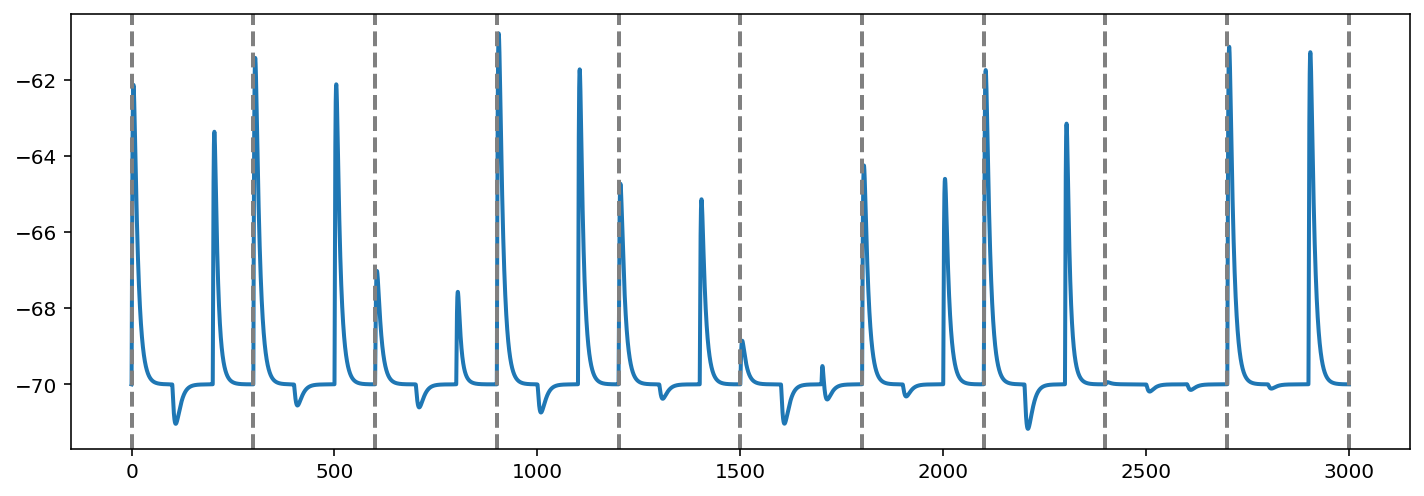

In [19]:
figure(figsize=(12,4))
plot(t, V, label='somatic potential')
[axvline(i*300, color='grey', ls='--') for i in range(0,trial_n+1)];


In [20]:
# Summed response at time t=10 ms (you can try different time point)
t_sample = 10

VE = V[((np.arange(trial_n)*300+t_sample)*ms/defaultclock.dt).astype(int)]
VI = V[((np.arange(trial_n)*300+100+t_sample)*ms/defaultclock.dt).astype(int)]
VS = V[((np.arange(trial_n)*300+200+t_sample)*ms/defaultclock.dt).astype(int)]

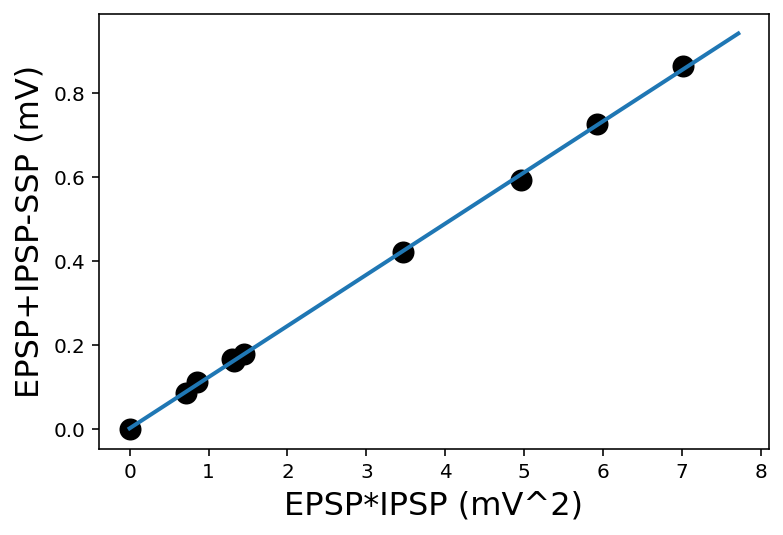

In [21]:
#plot the results
x=-(VE-EL/mV)*(VI-EL/mV)   #dimension of EL shall match V!
y=VE+VI-VS-EL/mV

plot(x, y,'ko',markersize=10)
z=polyfit(x, y, 1)    # linear fitting
xp = linspace(0,max(x)*1.1,100)
plot(xp,xp*z[0]+z[1])
plt.xlabel('EPSP*IPSP (mV^2)')
plt.ylabel('EPSP+IPSP-SSP (mV)');

After you understand the code, you can try to modify the code to investigate whether the bilinear rule holds for a pair of E and I current input? 

In [22]:
#insert your code here
#no answer yet

Also, you can investigate how general the rule is for synaptic condutance inputs. For example, when the neuron receives a pair of E inputs, a pair of I inputs, or multiple inputs, does the bilinear rule still hold?

In [23]:
#insert your code here
#no answer yet

Finally, you can investigate how does the shunting coefficient $k_{EI}$ depend on the input location? From your result, can you tell what is the most effective way for an inhibitory input to shunt an excitatory input in this passive neuron?

In [24]:
#insert your code here
#no answer yet

## Detailed Reconstruction of a Neuron

Software tools such as [NEURON](https://neuron.yale.edu) enable researchers to construct detailed compartmental models of any type of neuron. The morphology of such a detailed model is constrained by the anatomical reconstruction of the corresponding ‘real’ neuron. This is possible if length, size and orientation of each dendritic segment are measured under a microscope, after the neuron has been filled with a suitable dye. Before the anatomical reconstruction, the electrophysiological properties of the neuron can be characterized by stimulating the neuron with a time-dependent electric current. The presence of specific ion channel types can be inferred, with genetic methods, from the composition of the intracellular liquid, extracted from the neuron. The distribution of ion channels across the dendrite is probably the least constrained parameter. It is sometimes inferred from another set of experiments on neurons belonging to the same class. All the experimental knowledge about the neuron is then condensed in a computational neuron model. 